# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Problem Statement: 
- To determine if the new webpage for E-News Express improves convertion rate of viewers to subscribers

### Objectives:
- To assess whether the viewer retention period and conversion rate is improved using the new webpage
- To see if the preferred language is a significant parameter influencing viewer retention and conversion rate

### Setting up $H_{0}$ and $H_{a}$ :
- $H_{o}$ : The new webpage does not improve viewer to subscriber conversion rate
- $H_{a}$ : The new webpage does improve viewer to subscriber conversion rate

### Key Variables
- Level of Significance *$ \alpha = 5% $*
- Sample size *$ n = 100 $*

## Import all the necessary libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import scipy.stats as stats

## Reading the Data into a DataFrame

In [22]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [15]:
df.head(10) # Displays first 10 rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


In [16]:
df.tail(10) #Displays Last 10 rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
90,546477,treatment,new,5.40,no,French
91,546451,treatment,new,8.47,yes,English
92,546566,control,old,8.35,no,French
93,546474,treatment,new,4.94,no,French
94,546550,control,old,3.05,no,English
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [17]:
df.shape # Displays number of rows and columns in the dataset respectively

(100, 6)

In [21]:
df['user_id'] = df['user_id'].astype(str) # Convert User ID into a string
df.describe() # Displays Statistical Summary of the Data

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


In [18]:
df.isnull().sum() # Shows number of null entries

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [31]:
df[df.duplicated(['user_id'], keep=False)].count() # Displays any rows with duplicate User IDs 

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Section Summary:
#### Within the dataset:
    - There are 100 rows and 6 columns
    - There are no null values"
    - There are no duplicate values

#### The statistical summary with regards to the amount of time spent on the webpage by the users:
    - The mean is 5.38 mins
    - The standard dev is 2.38 mins
    - The min 0.19 mins
    - The max is 10.71 mins


## Univariate Analysis

### [1] Countplot of the user's language preference

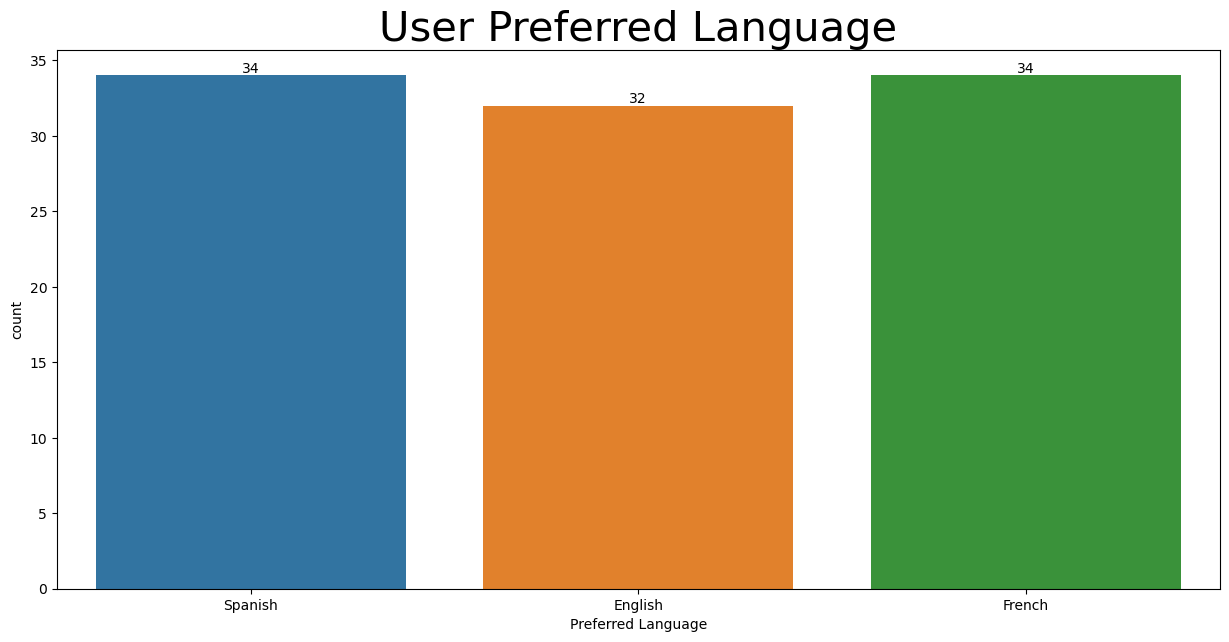

In [58]:
plt.figure(figsize=(15,7)) # Establish Plot Area
fig1 = sns.countplot(data=df,x='language_preferred') # Create a countplot

# Adding graph title, axis label and value labels
plt.xlabel('Preferred Language')
plt.title('User Preferred Language', fontsize = 30) 
fig1.bar_label(fig1.containers[0], label_type='edge'); 

### [2] Boxplot of user time spent on the webpage

the median time spent on the landing page (regardless of group type) is 5.415 minutes


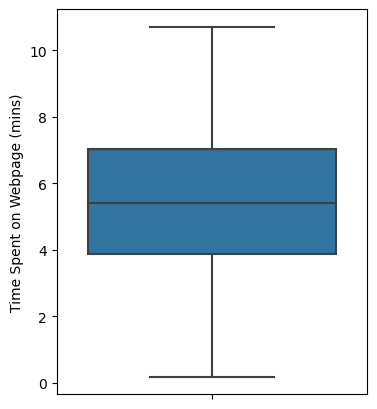

In [82]:
# Creating a boxplot of user time spent on the landing page and printing the median time
plt.figure(figsize=(4,5))
sns.boxplot(data=df, y='time_spent_on_the_page')
plt.ylabel('Time Spent on Webpage (mins)')
print(f"the median time spent on the landing page (regardless of group type) is {df['time_spent_on_the_page'].median()} minutes")

### [3] Countplot of number of users converted to e-news subscribers

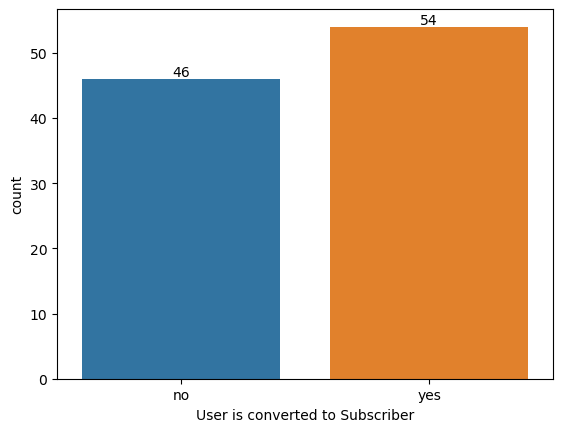

In [89]:
# Creating and labelling a countplot of the number of users converted in the dataset

fig3= sns.countplot(data=df,x='converted')
fig3.bar_label(fig3.containers[0], label_type='edge')
plt.xlabel('User is converted to Subscriber');

### Section Summary:
- Univariate Analysis was conducted on the dataset:
    - Users had 3 preferred languages with a relatively even split (34% each preferring Spanish and French and 32% preferring Egnlish)
    - The median time spent on the landing page is around 5.4 minutes, with the majority of users spending between 4-7 minutes on the page
    - Regardless of experimental group, 54% of users were converted to subscribers

### Bivariate Analysis

### [1] Are people who spend more time on the landing page more likely to get converted?

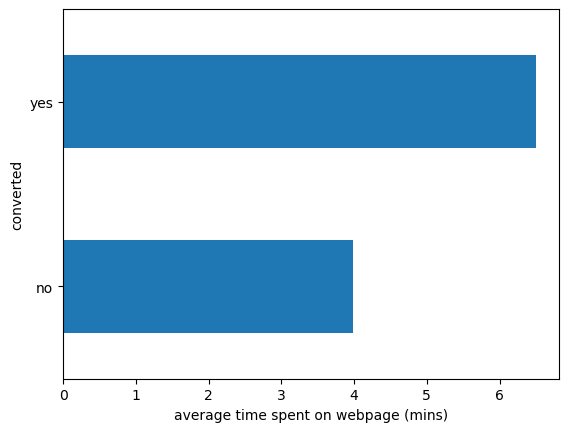

In [114]:
# Finding the median of all user times categorized based on whether the individuals were converted into a subscriber using the groupby function
# Plotting and lavbelling the grouped data

df.groupby('converted')['time_spent_on_the_page'].median(numeric_only = True).plot.barh()
plt.xlabel('average time spent on webpage (mins)');

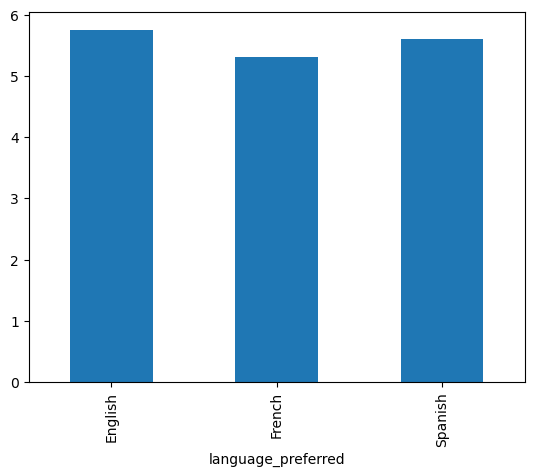

In [115]:
df.groupby('language_preferred')['time_spent_on_the_page'].median(numeric_only = True).plot.bar();

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

### Step 1: Define the null and alternate hypotheses

### Step 2: Select Appropriate test

### Step 3: Decide the significance level

### Step 4: Collect and prepare data

### Step 5: Calculate the p-value

### Step 6: Compare the p-value with $\alpha$

### Step 7:  Draw inference

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

## 3. Is the conversion and preferred language are independent or related?

## 4. Is the time spent on the new page same for the different language users?

## Conclusion and Business Recommendations

___